## Métodos de Runge-Kutta de 2ª Ordem + Euler

Este notebook implementa quatro métodos para resolução numérica de EDOs:
- Euler (RK1)
- Heun (RK2 com \u03b1 = 1/2)
- Ponto Médio (RK2 com \u03b1 = 1)
- Ralston (RK2 com \u03b1 = 2/3)

Formato geral de Runge-Kutta de 2ª ordem:

k1 = h * f(x_n, y_n)
k2 = h * f(x_n + h/(2\u03b1), y_n + k1/(2\u03b1))
y_{n+1} = y_n + (1 - 1/(2\u03b1)) * k1 + 1/(2\u03b1) * k2

Todos têm erro global O(h^2), exceto Euler que tem O(h).

In [11]:
import matplotlib.pyplot as plt

In [26]:
def runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun"):
    print(f"\nMétodo de {metodo.capitalize()}\n")
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'K1':<15}{'K2':<15}{'|yn - yn-1|':<15}")
    print("-" * 76)

    x_vals = [x0]
    y_vals = [y0]
    erros = [None]

    # Iteração 0
    k1 = f(x0, y0)
    if metodo == "heun":
        k2 = f(x0 + h, y0 + h * k1)
        y_next = y0 + (h / 2) * (k1 + k2)
    elif metodo == "ponto medio":
        k2 = f(x0 + h / 2, y0 + h / 2 * k1)
        y_next = y0 + h * k2
    elif metodo == "ralston":
        k2 = f(x0 + 3 * h / 4, y0 + 3 * h / 4 * k1)
        y_next = y0 + h * (k1 + 2 * k2) / 3
    else:
        raise ValueError("Método inválido")

    print(f"{0:<6}{x0:<10.5f}{y0:<15.5f}{k1:<15.5f}{k2:<15.5f}{'-':<15}")
    
    # Atualiza para próxima iteração
    x0 += h
    erro = abs(y_next - y_vals[-1])
    y0 = y_next
    x_vals.append(x0)
    y_vals.append(y0)
    erros.append(erro)

    # Iterações restantes
    for i in range(1, n):
        k1 = f(x0, y0)
        if metodo == "heun":
            k2 = f(x0 + h, y0 + h * k1)
            y_next = y0 + (h / 2) * (k1 + k2)
        elif metodo == "ponto medio":
            k2 = f(x0 + h / 2, y0 + h / 2 * k1)
            y_next = y0 + h * k2
        elif metodo == "ralston":
            k2 = f(x0 + 3 * h / 4, y0 + 3 * h / 4 * k1)
            y_next = y0 + h * (k1 + 2 * k2) / 3

        erro = abs(y_next - y0)
        print(f"{i:<6}{x0:<10.5f}{y0:<15.5f}{k1:<15.5f}{k2:<15.5f}{erro:<15.5f}")

        x0 += h
        y0 = y_next
        x_vals.append(x0)
        y_vals.append(y0)
        erros.append(erro)

    # Gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, y_vals, marker='o', label='y(x)', color='blue')
    plt.plot(x_vals[1:], erros[1:], marker='x', linestyle='--', label='Erro |yn - yn-1|', color='red')
    plt.title(f'Solução e Erro - Método {metodo.capitalize()}')
    plt.xlabel('x')
    plt.ylabel('y e Erro')
    plt.legend()
    plt.grid(True)
    plt.show()


Método de Heun

ITER. x0        y0             K1             K2             |yn - yn-1|    
----------------------------------------------------------------------------
0     1.00000   2.00000        4.00000        4.12080        -              
1     1.01000   2.04060        4.12202        4.24692        0.04184        
2     1.02000   2.08245        4.24820        4.37736        0.04313        
3     1.03000   2.12558        4.37869        4.51228        0.04445        
4     1.04000   2.17003        4.51367        4.65185        0.04583        
5     1.05000   2.21586        4.65330        4.79627        0.04725        
6     1.06000   2.26311        4.79779        4.94572        0.04872        
7     1.07000   2.31182        4.94730        5.10040        0.05024        
8     1.08000   2.36206        5.10206        5.26052        0.05181        
9     1.09000   2.41388        5.26225        5.42630        0.05344        


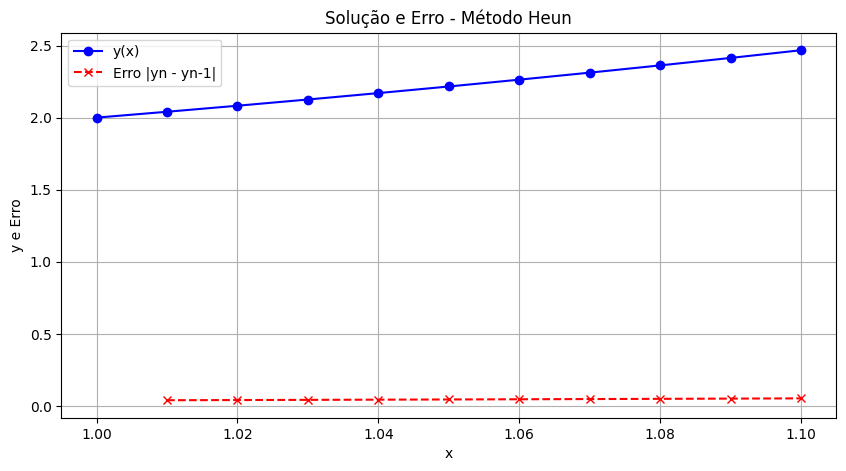

In [27]:
# Definição da função diferencial
f = lambda x, y: 2*x*y

# Condições iniciais
x0 = 1
y0 = 2
h = 0.01
n = 10

runge_kutta_2_ordem(f, x0, y0, h, n, metodo="heun")
